In [44]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
train_data = pd.read_csv('_train.csv')

In [46]:
x_train = train_data.drop('label', axis=1)
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y_train = train_data['label']
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [48]:
x_train.shape

(42000, 784)

In [49]:
y_train.shape

(42000,)

In [50]:
x_test = pd.read_csv('_test.csv')
x_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
x_test.shape

(28000, 784)

In [52]:
x_train = x_train.values
x_test = x_test.values

In [53]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (42000, 28, 28, 1)
x_test shape: (28000, 28, 28, 1)
Number of images in x_train 42000
Number of images in x_test 28000


In [22]:
# # Importing the required Keras modules containing model and layers
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# # Creating a Sequential Model and adding the layers
# model = Sequential()
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(64, activation=tf.nn.relu))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation=tf.nn.softmax))

In [54]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [55]:
x_train.shape

(42000, 28, 28, 1)

In [56]:
y_train.shape

(42000,)

In [57]:
x_test.shape

(28000, 28, 28, 1)

In [58]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [59]:
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#model.fit(x=x_train,y=y_train_data, epochs=3)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/2
13/63 [=====>........................] - ETA: 13s - loss: 1.7183 - accuracy: 0.4381

KeyboardInterrupt: 

In [33]:
result = model.evaluate(x_train, y_train)

1313/1313 [==============================] - 10s 8ms/step - loss: 0.0957 - accuracy: 0.9711


In [43]:
result = []

for i in range(len(x_test)):
    pred = model.predict(x_test[i].reshape(1, 28, 28, 1), verbose = 0)
    result.append(np.argmax(pred))
    print(f"Writing line (int({len(result)}/28000))")

Writing line (int(1/28000))
Writing line (int(2/28000))
Writing line (int(3/28000))
Writing line (int(4/28000))
Writing line (int(5/28000))
Writing line (int(6/28000))
Writing line (int(7/28000))
Writing line (int(8/28000))
Writing line (int(9/28000))
Writing line (int(10/28000))
Writing line (int(11/28000))
Writing line (int(12/28000))
Writing line (int(13/28000))
Writing line (int(14/28000))
Writing line (int(15/28000))
Writing line (int(16/28000))
Writing line (int(17/28000))
Writing line (int(18/28000))
Writing line (int(19/28000))
Writing line (int(20/28000))
Writing line (int(21/28000))
Writing line (int(22/28000))
Writing line (int(23/28000))
Writing line (int(24/28000))
Writing line (int(25/28000))
Writing line (int(26/28000))
Writing line (int(27/28000))
Writing line (int(28/28000))
Writing line (int(29/28000))
Writing line (int(30/28000))
Writing line (int(31/28000))
Writing line (int(32/28000))
Writing line (int(33/28000))
Writing line (int(34/28000))
Writing line (int(35/28

KeyboardInterrupt: 

In [146]:
print(resultlist)
resultlist.shape

In [42]:
import csv

resultlist
csvfile = "result.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in resultlist:
        writer.writerow([val])

In [51]:
#predictions = model.predict_classes(X_test, verbose=0)
predictions = model.predict(x_test, verbose=0)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("testformat.csv", index=False, header=True)

ValueError: Per-column arrays must each be 1-dimensional

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

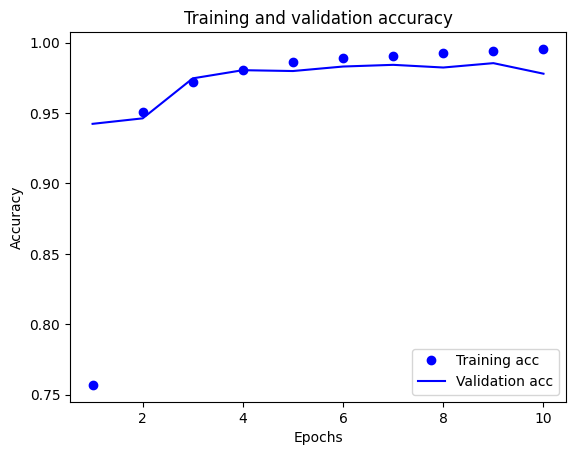

In [47]:
#neural network result
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

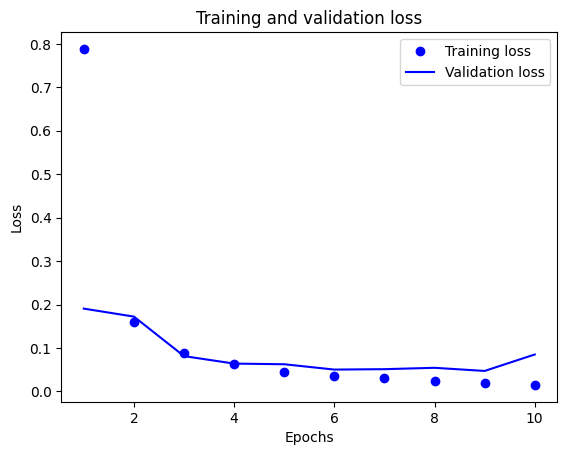

In [46]:
#neural network result
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
